Лабораторная работа № 3 по Нейроинформатике

Многослойные сети. Алгоритм обратного распространения ошибки

Выполнила: Тимофеева Наталья М8О-408Б-19

Вариант № 16

Часть 1

Классификация

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers
from matplotlib import pyplot as plt
import itertools
from timeit import default_timer as timer

In [2]:
def ellipse(t, a, b, x0, y0):
    x = x0 + a * np.cos(t)
    y = y0 + b * np.sin(t)
    return x, y

In [3]:
def parabola(t, p, x0, y0):
    x = x0 + t ** 2 / (2. * p)
    y = y0 + t
    return x, y

In [4]:
def rotate(x, y, alpha):
    xr = x * np.cos(alpha) - y * np.sin(alpha)
    yr = x * np.sin(alpha) - y * np.cos(alpha)
    return xr, yr

In [5]:
t = np.arange(0, 2 * np.pi, 0.001)

Создаём эллипсы и параболу

In [6]:
x1, y1 = ellipse(t, 0.4, 0.15, 0.1, -0.15)
x1, y1 = rotate(x1, y1, np.pi / 6)

x2, y2 = ellipse(t, 0.7, 0.5, 0, 0)
x2, y2 = rotate(x2, y2, np.pi / 3)

x3, y3 = parabola(t, 1, 0, -0.8)
x3, y3 = rotate(x3, y3, np.pi / 2)

Преобразуем данные в удобный формат

In [7]:
d1 = [[[x, y], [1., 0., 0.]] for x, y in zip(x1, y1)]
d2 = [[[x, y], [0., 1., 0.]] for x, y in zip(x2, y2)]
d3 = [[[x, y], [0., 0., 1.]] for x, y in zip(x3, y3)]

Объединяем и перемешиваем

In [8]:
dataset = d1 + d2 + d3
np.random.shuffle(dataset)

Разбиваем на обучающую и тестовую выборки

In [9]:
separ = int(len(dataset) * 0.8)
train_data = dataset[:separ]
test_data = dataset[separ:]

train_input = [i[0] for i in train_data]
train_output = [i[1] for i in train_data]

Создание модели

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, input_dim = 2, activation='tanh'))
model.add(keras.layers.Dense(3, activation='sigmoid'))
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])

Обучение модели

In [11]:
len(train_data)

15081

In [12]:
epochs = 1000
batch_size = int(len(train_data) * 0.004)

time_start = timer()
hist = model.fit(train_input, train_output, batch_size = batch_size, epochs = epochs)
time_end = timer()

Epoch 1/1000
252/252 [==============================] - 1s 845us/step - loss: 0.1573 - mae: 0.3402
Epoch 2/1000
252/252 [==============================] - 0s 817us/step - loss: 0.1346 - mae: 0.2802
Epoch 3/1000
252/252 [==============================] - 0s 803us/step - loss: 0.1326 - mae: 0.2698
Epoch 4/1000
252/252 [==============================] - 0s 807us/step - loss: 0.1317 - mae: 0.2648
Epoch 5/1000
252/252 [==============================] - 0s 898us/step - loss: 0.1310 - mae: 0.2611
Epoch 6/1000
252/252 [==============================] - 0s 799us/step - loss: 0.1302 - mae: 0.2578
Epoch 7/1000
252/252 [==============================] - 0s 765us/step - loss: 0.1290 - mae: 0.2558
Epoch 8/1000
252/252 [==============================] - 0s 856us/step - loss: 0.1267 - mae: 0.2520
Epoch 9/1000
252/252 [==============================] - 0s 803us/step - loss: 0.1222 - mae: 0.2477
Epoch 10/1000
252/252 [==============================] - 0s 791us/step - loss: 0.1160 - mae: 0.2399
Epoch 11/

In [13]:
print('Эпох: {0}'.format(epochs))
print('Время обучения: {0} секунд'.format(int(time_end - time_start)))
print('Функция потерь MSE: {0}'.format(min(hist.history['loss'])))
print('Метрика качества MAE: {0}'.format(min(hist.history['mae'])))

Эпох: 1000
Время обучения: 232 секунд
Функция потерь MSE: 0.023233061656355858
Метрика качества MAE: 0.03531397506594658


In [14]:
x = np.linspace(-6, 1, 200)
y = np.linspace(-3, 20, 200)

In [15]:
line = np.array(list(itertools.product(x, y)))
xs, ys = np.hsplit(line, 2)

In [18]:
predicted = model.predict(line)

1250/1250 [==============================] - 1s 780us/step


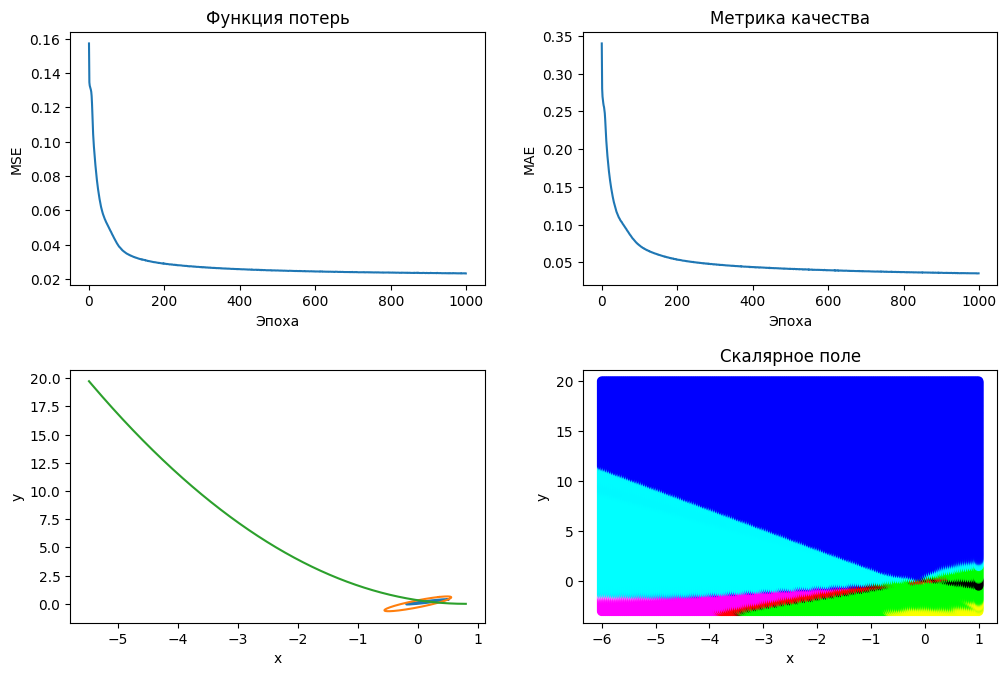

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6.5))
fig.tight_layout(h_pad = 4, w_pad = 4)

axes[0, 0].set_title('Функция потерь')
axes[0, 0].set_xlabel('Эпоха')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].plot(hist.history['loss'])

axes[0, 1].set_title('Метрика качества')
axes[0, 1].set_xlabel('Эпоха')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].plot(hist.history['mae'])

axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('y')
axes[1, 0].plot(x1, y1)
axes[1, 0].plot(x2, y2)
axes[1, 0].plot(x3, y3)

axes[1, 1].set_title('Скалярное поле')
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('y')
axes[1, 1].scatter(xs, ys, c = predicted)
